### Reading in the dataset

In [131]:
import pandas as pd
import chardet

# Open the file in binary mode
with open(r'C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx', 'rb') as f:
    result = chardet.detect(f.read())
    
# Print the detected encoding
print(result['encoding'])


None


In [132]:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

In [133]:
#Checking the data has been read correctly

In [134]:
df.info

<bound method DataFrame.info of      year  month  tmax_degC  tmin_degC  airfrost_days  totalrain_mm  \
0    1976      4       11.7        4.4              2          16.2   
1    1976      5       15.8        7.9              0          79.9   
2    1976      6       22.3       12.0              0          16.6   
3    1976      7       24.0       13.2              0          16.9   
4    1976      8       23.0       11.9              0          17.3   
5    1976      9       16.4        9.6              0         134.9   
6    1976     10       13.0        7.5              0         127.7   
7    1976     11        8.6        3.2              1          32.4   
8    1976     12        3.7        0.3             10          75.3   
9    1977      1        4.6        0.4             12         113.8   
10   1977      2        6.3        1.5              6         201.4   
11   1977      3        9.5        3.4              3          59.7   
12   1977      4       10.6        3.6       

In [366]:
print (df.columns)

Index(['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days',
       'totalrain_mm', 'totalsun_hours', 'wildfire_y-n', 'wildfire_quantity'],
      dtype='object')


In [368]:
#print data types
print(df.dtypes.to_frame(name='Data Type'))

#error has occured as all data types are int64. 
#Therefore, when print(df.describe()) is used, not all columns are appearing

                  Data Type
year                  int64
month                 int64
tmax_degC           float64
tmin_degC           float64
airfrost_days         int64
totalrain_mm        float64
totalsun_hours      float64
wildfire_y-n          int64
wildfire_quantity     int64


In [135]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 9)
print(df.describe(include='all'))

              year       month   tmax_degC   tmin_degC  airfrost_days  \
count   537.000000  537.000000  537.000000  537.000000     537.000000   
mean   1998.122905    6.525140   13.458845    6.690689       2.573557   
std      12.930634    3.447882    5.418308    4.075769       4.408130   
min    1976.000000    1.000000    1.000000   -3.000000       0.000000   
25%    1987.000000    4.000000    8.900000    3.400000       0.000000   
50%    1998.000000    7.000000   13.200000    6.100000       0.000000   
75%    2009.000000   10.000000   18.400000   10.400000       3.000000   
max    2020.000000   12.000000   25.600000   14.500000      25.000000   

       totalrain_mm  totalsun_hours  wildfire_quantity  
count    537.000000      537.000000         537.000000  
mean      69.839665      119.700559           0.417132  
std       41.721892       62.933924           1.234276  
min        4.600000        5.800000           0.000000  
25%       41.200000       60.300000           0.000000  


## EDA

In [136]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

### Exploring Climate:

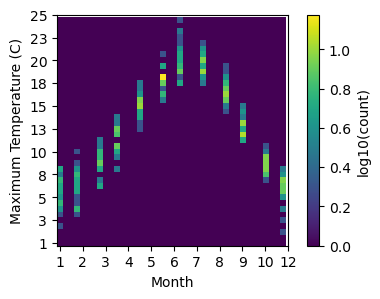

Figure 1: Average monthly maximum temperature
organised by month type and represented as a
heatmap (log10)


In [137]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['month'], df['tmax_degC'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Month')
plt.ylabel('Maximum Temperature (C)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

print('Figure 1: Average monthly maximum temperature') 
print('organised by month type and represented as a')
print('heatmap (log10)')

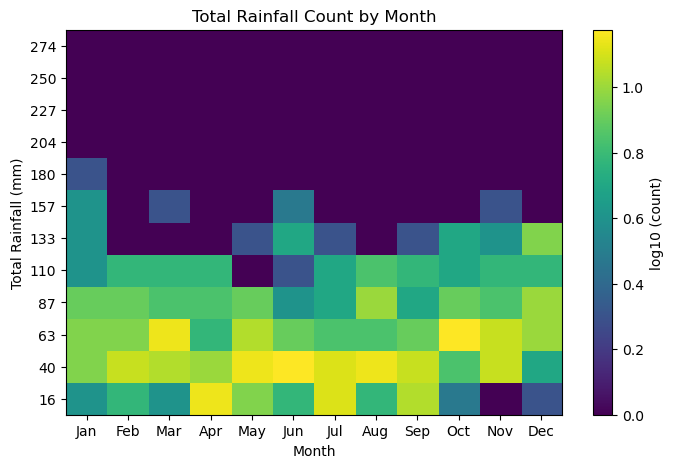

Figure: Log10 count of total rainfall (mm) for each month across the timeseries dataset from
1976-2020


In [138]:
nbins = 12

heatmap, xedges, yedges = np.histogram2d(df['month'], df['totalrain_mm'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(8,5))

plt.imshow(np.log10(heatmap).T, origin='lower',extent=extent, vmin=0, aspect='auto') # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=(xedges[:-1] + xedges[1:]) / 2, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

def round_to_1sf(x, whole_numbers=False):
    x = np.asarray(x)  # Ensure x is an array
    rounded = np.zeros_like(x)  # Create an array to hold rounded values
    for i in range(len(x)):
        if x[i] == 0:
            rounded[i] = 0
        else:
            if whole_numbers:
                rounded[i] = int(np.round(x[i]))  # Round to nearest whole number and convert to int
            else:
                rounded[i] = np.round(x[i], 1 - int(np.floor(np.log10(np.abs(x[i])))))
    return rounded

# Set y-ticks using midpoints of yedges and round to 1 significant figure
y_tick_values = (yedges[:-1] + yedges[1:]) / 2
plt.yticks(ticks=y_tick_values, labels=round_to_1sf(y_tick_values, whole_numbers=True).astype(int))
plt.title('Total Rainfall Count by Month')
plt.colorbar(label='log10 (count)', cmap="plasma")
plt.show()

print('Figure: Log10 count of total rainfall (mm) for each month across the timeseries dataset from') 
print('1976-2020')

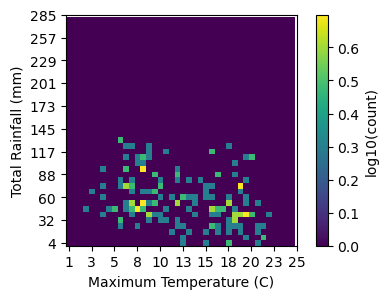

In [9]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['tmax_degC'], df['totalrain_mm'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Maximum Temperature (C)')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

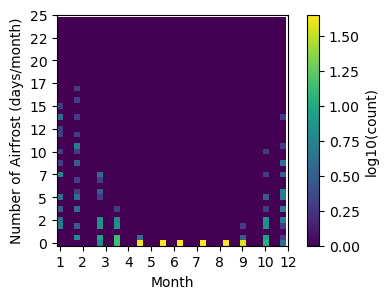

In [10]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['month'], df['airfrost_days'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Month')
plt.ylabel('Number of Airfrost (days/month)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

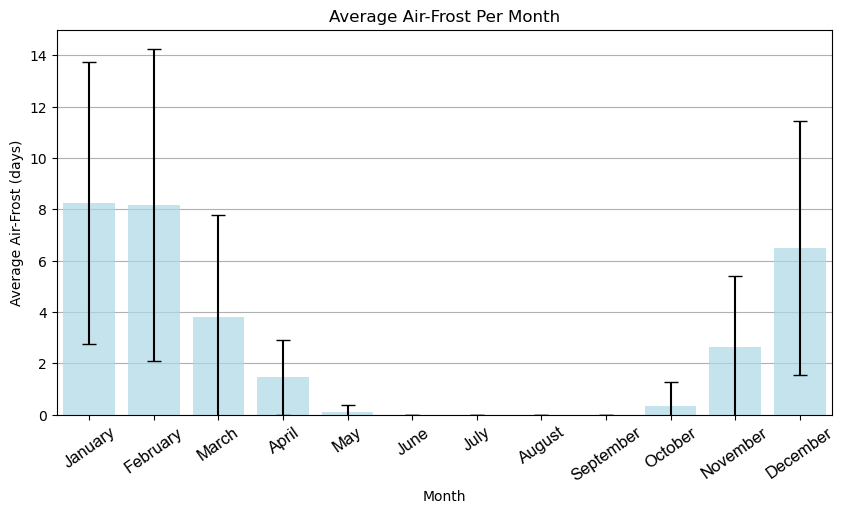

Figure 4: Average air-frost days per month between 1976-2020 by month. Error bars representing
one plus and minus the standard deviation


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming 'df' is your DataFrame
# Step 1: Aggregate the data by month to get average and standard deviation
monthly_airfrost = df.groupby('month')['airfrost_days'].agg(['mean', 'std']).reset_index()
monthly_airfrost.columns = ['Month', 'Average Airfrost Days', 'Standard Deviation']

# Step 2: Create a bar plot for average airfrost days
plt.figure(figsize=(10, 5))

# Plotting Average Airfrost Days
plt.bar(monthly_airfrost['Month'], monthly_airfrost['Average Airfrost Days'], 
        yerr=monthly_airfrost['Standard Deviation'], capsize=5, 
        color='lightblue', alpha=0.7, zorder=2)
plt.xlim(0,15)

# Step 3: Customizing the plot
plt.xticks(ticks=monthly_airfrost['Month'], labels=[calendar.month_name[i] for i in range(1, 13)])  # Set month names
plt.yticks(ticks=range(0, 16, 2))
plt.xticks(rotation=35, fontsize=12, fontname='Arial') 
plt.ylim(0, 15)
plt.xlim(0.5, 12.5)

plt.title('Average Air-Frost Per Month')
plt.xlabel('Month')
plt.ylabel('Average Air-Frost (days)')
plt.grid(axis='y', zorder=0)

# Show the plot
plt.show()

print('Figure 4: Average air-frost days per month between 1976-2020 by month. Error bars representing') 
print('one plus and minus the standard deviation')


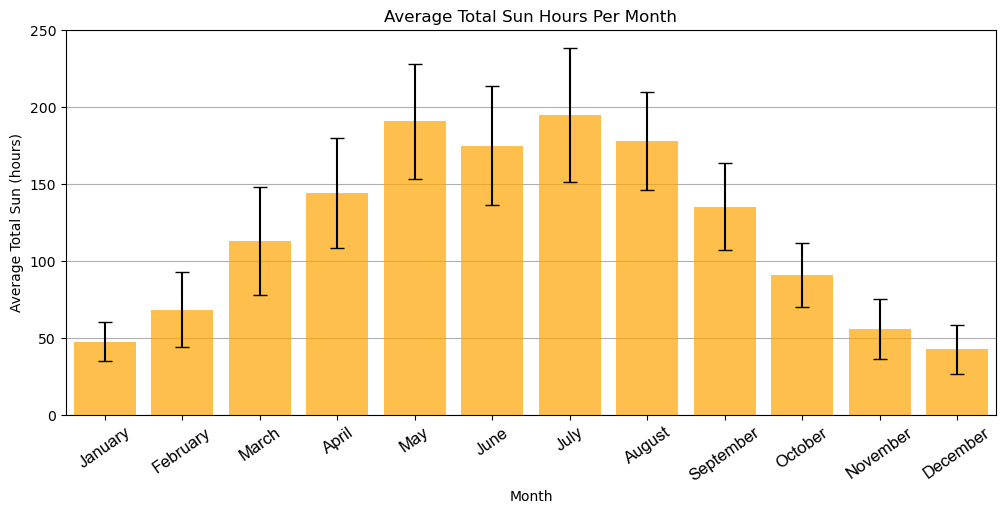

Figure 5: Average total sun hours per month between 1976-2020 by month. Error bars representing
one plus and minus the standard deviation


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming 'df' is your DataFrame
# Step 1: Aggregate the data by month to get average and standard deviation
monthly_totalsun = df.groupby('month')['totalsun_hours'].agg(['mean', 'std']).reset_index()
monthly_totalsun.columns = ['Month', 'Average Total Sun Hours', 'Standard Deviation']

# Step 2: Create a bar plot for average airfrost days
plt.figure(figsize=(12, 5))

# Plotting Average Airfrost Days
plt.bar(monthly_totalsun['Month'], monthly_totalsun['Average Total Sun Hours'], 
        yerr=monthly_totalsun['Standard Deviation'], capsize=5, 
        color='orange', alpha=0.7, zorder=2)
plt.xlim(0,15)

# Step 3: Customizing the plot
plt.xticks(ticks=monthly_airfrost['Month'], labels=[calendar.month_name[i] for i in range(1, 13)])  # Set month names
plt.xticks(rotation=35, fontsize=12, fontname='Arial') 

plt.title('Average Total Sun Hours Per Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sun (hours)')
plt.grid(axis='y', zorder=0)
plt.xlim(0.5,12.5)

# Show the plot
plt.show()

print('Figure 5: Average total sun hours per month between 1976-2020 by month. Error bars representing') 
print('one plus and minus the standard deviation')


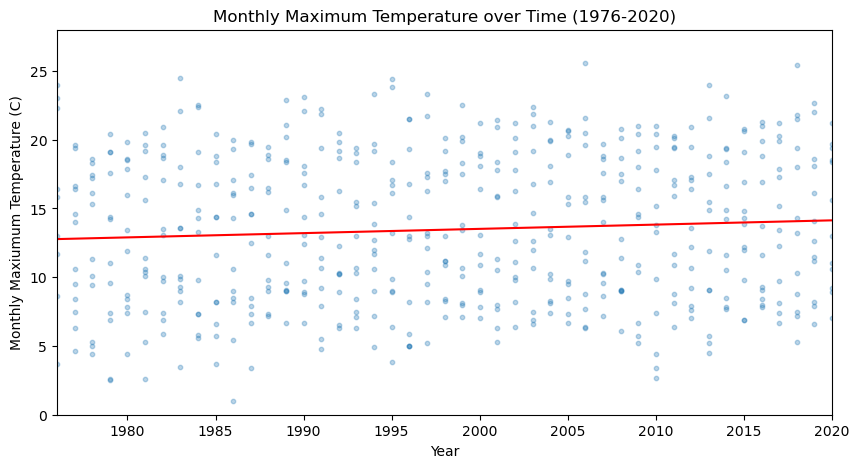

In [13]:
ax = df.plot.scatter('year', 'tmax_degC', figsize=(10, 5), alpha=0.3, s=10)

# Linear regression to calculate trend line
x = df['year']
y = df['tmax_degC']
z = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (straight line)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red')  # 'p(x)' gives the y-values of the trend line
plt.xlabel('Year')
plt.ylabel('Monthly Maxiumum Temperature (C)')
plt.title('Monthly Maximum Temperature over Time (1976-2020)')

plt.xlim(1976, 2020)
plt.ylim(0, 28)

plt.show()

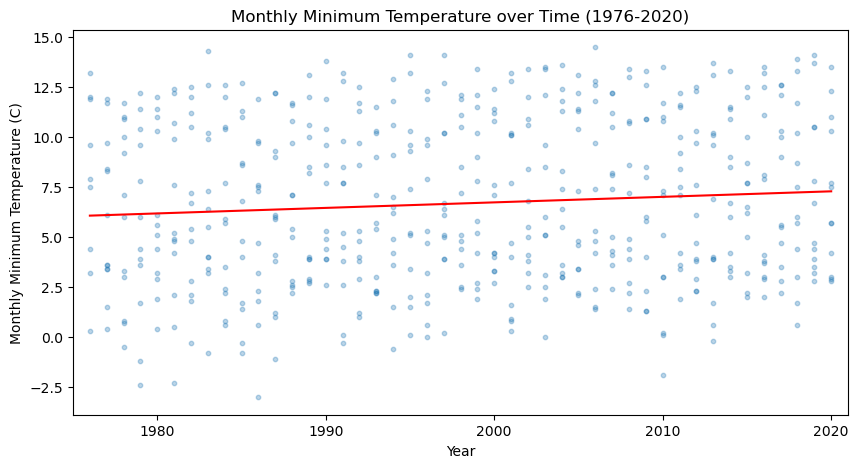

In [15]:
ax = df.plot.scatter('year', 'tmin_degC', figsize=(10, 5), alpha=0.3, s=10)

# Linear regression to calculate trend line
x = df['year']
y = df['tmin_degC']
z = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (straight line)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red')  # 'p(x)' gives the y-values of the trend line
plt.xlabel('Year')
plt.ylabel('Monthly Minimum Temperature (C)')
plt.title('Monthly Minimum Temperature over Time (1976-2020)')

plt.xlim(1975, 2021)
plt.show()

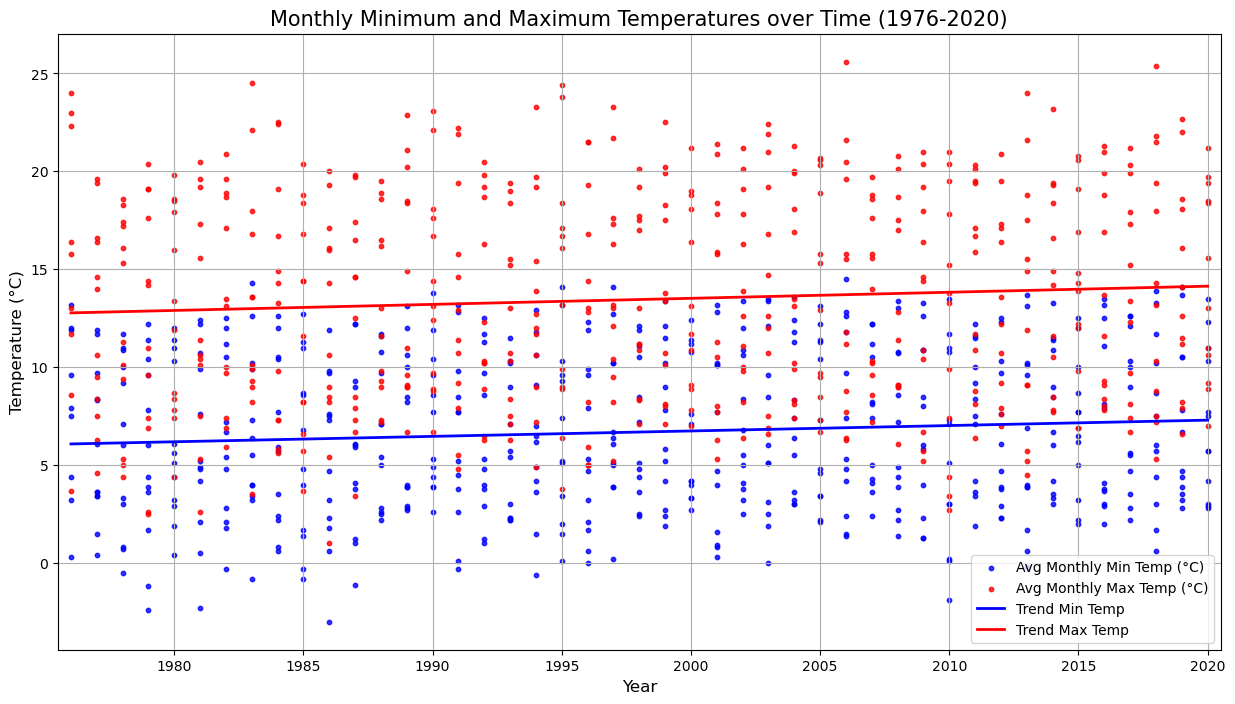

  Figure 2: Minimum and maximum average monthly temperatures plotted between 1976-2020


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Step 2: Create scatter plots for tmin_degC and tmax_degC
ax.scatter(df['year'], df['tmin_degC'], alpha=0.8, s=10, label='Avg Monthly Min Temp (°C)', color='blue')
ax.scatter(df['year'], df['tmax_degC'], alpha=0.8, s=10, label='Avg Monthly Max Temp (°C)', color='red')

# Step 3: Linear regression for tmin_degC
z1 = np.polyfit(df['year'], df['tmin_degC'], 1)  # Fit a 1st degree polynomial (straight line)
p1 = np.poly1d(z1)

# Step 4: Linear regression for tmax_degC
z2 = np.polyfit(df['year'], df['tmax_degC'], 1)  # Fit a 1st degree polynomial (straight line)
p2 = np.poly1d(z2)

# Step 5: Plot the trend lines
ax.plot(df['year'], p1(df['year']), color='blue', linewidth=2, label='Trend Min Temp')
ax.plot(df['year'], p2(df['year']), color='red', linewidth=2, label='Trend Max Temp')

# Step 6: Customize the plot
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Monthly Minimum and Maximum Temperatures over Time (1976-2020)', fontsize=15)
ax.set_xlim(1975.5, 2020.5)
ax.legend()
ax.grid()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right')

# Show the plot
plt.show()

print('  Figure 2: Minimum and maximum average monthly temperatures plotted between 1976-2020')

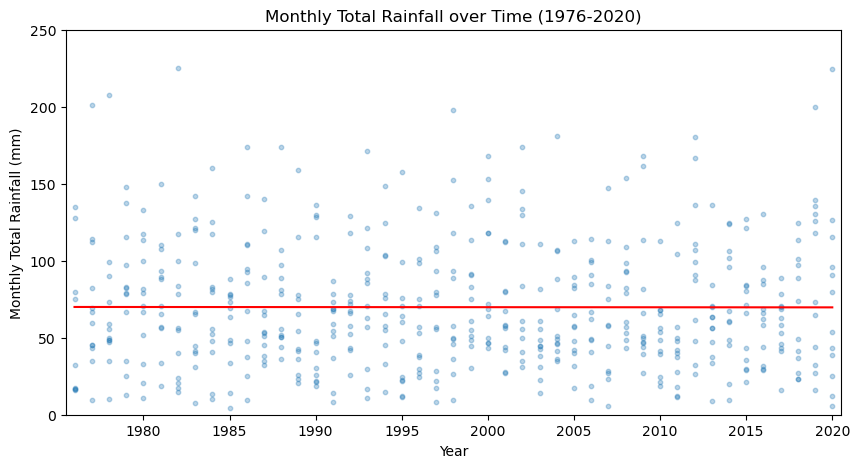

 Figure 3: Monthly total rainfall over time between 1976-2020


In [17]:
ax = df.plot.scatter('year', 'totalrain_mm', figsize=(10, 5), alpha=0.3, s=10)

# Linear regression to calculate trend line
x = df['year']
y = df['totalrain_mm']
z = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (straight line)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red')  # 'p(x)' gives the y-values of the trend line
plt.xlabel('Year')
plt.ylabel('Monthly Total Rainfall (mm)')
plt.title('Monthly Total Rainfall over Time (1976-2020)')
plt.xlim(1975.5, 2020.5)
plt.ylim(0, 250)
plt.show()

print(' Figure 3: Monthly total rainfall over time between 1976-2020')

### Exploring Wildfires:

In [18]:
print(df['wildfire_quantity'])

0       0
1       5
2       1
3      15
4       6
       ..
532     0
533     0
534     0
535     0
536     0
Name: wildfire_quantity, Length: 537, dtype: int64


In [19]:
# Assuming your DataFrame is named df and it has a column 'year' for the year of each wildfire
wildfire_per_month = df.groupby('month')['wildfire_quantity'].sum().reset_index()

# Rename the columns for clarity
wildfire_per_month.columns = ['Month', 'Wildfire Count']

# Display the new DataFrame
print(wildfire_per_month)

    Month  Wildfire Count
0       1               0
1       2              10
2       3              16
3       4              46
4       5              60
5       6              21
6       7              33
7       8              22
8       9               7
9      10               9
10     11               0
11     12               0


In [20]:
# Assuming your DataFrame is named df and it has a column 'year' for the year of each wildfire
wildfire_per_year = df.groupby('year')['wildfire_quantity'].sum().reset_index()

# Rename the columns for clarity
wildfire_per_year.columns = ['Year', 'Wildfire Count']

# Display the new DataFrame
print(wildfire_per_year)

    Year  Wildfire Count
0   1976              27
1   1977               7
2   1978               0
3   1979               0
4   1980               7
5   1981               0
6   1982               0
7   1983               0
8   1984               1
9   1985               0
10  1986               0
11  1987               0
12  1988               0
13  1989               7
14  1990               1
15  1991               1
16  1992              10
17  1993               5
18  1994               4
19  1995              10
20  1996               3
21  1997               4
22  1998               1
23  1999               4
24  2000               1
25  2001               3
26  2002               6
27  2003              11
28  2004               7
29  2005               3
30  2006               6
31  2007              11
32  2008               5
33  2009               7
34  2010               7
35  2011               6
36  2012               0
37  2013               5
38  2014               4


In [21]:
print(df.columns)  # Display the column name

Index(['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days',
       'totalrain_mm', 'totalsun_hours', 'wildfire_quantity'],
      dtype='object')


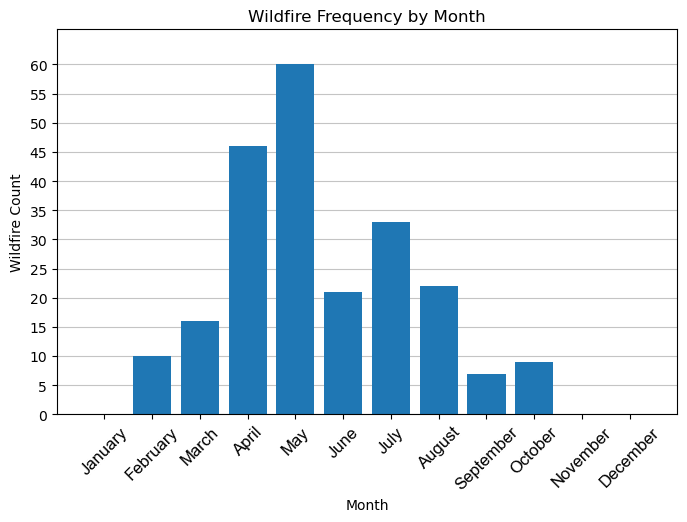

 Figure 5: Barplot showing count of wildfires per month from the dataset between 1976-2020


In [22]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Bar plot
plt.figure(figsize=(8, 5), dpi=100)
plt.bar(wildfire_per_month['Month'], wildfire_per_month['Wildfire Count'], 
        tick_label=[calendar.month_name[i] for i in wildfire_per_month['Month']], zorder=2)

plt.xlabel('Month')
plt.ylabel('Wildfire Count')
plt.title('Wildfire Frequency by Month')
plt.xticks(rotation=45, fontsize=12, fontname='Arial')  # Rotate x-axis labels if needed
plt.yticks(np.arange(0, wildfire_per_month['Wildfire Count'].max() + 5, 5))
plt.ylim(0, wildfire_per_month['Wildfire Count'].max() * 1.1)  # Adjust y-axis limit if necessary
plt.grid(axis='y', alpha=0.75, zorder=0)  # Optional: add gridlines
plt.show()

print(' Figure 5: Barplot showing count of wildfires per month from the dataset between 1976-2020')

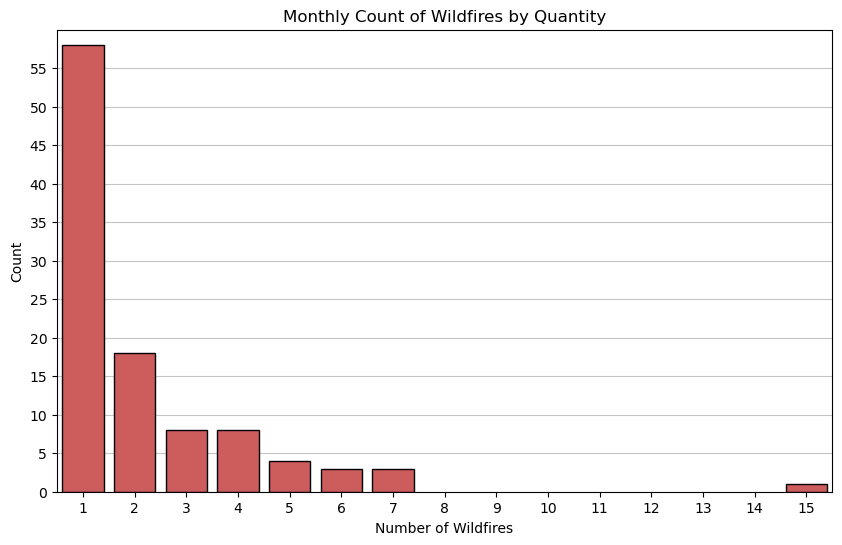

 Figure 6: Histogram of wildfire frequency by count with 0 wildfires being most common, followed by
 1-7 and then a very low count at 15


In [149]:
import matplotlib.pyplot as plt

# Count the occurrences of each wildfire quantity
wildfire_counts = df['wildfire_quantity'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(wildfire_counts.index, wildfire_counts.values, color='indianred', edgecolor='black', zorder=2)

plt.xlabel('Number of Wildfires')
plt.ylabel('Count')
plt.xlim(0.5,15.5)
plt.title('Monthly Count of Wildfires by Quantity')
plt.xticks(np.arange(1, 15.5, 1))
plt.yticks(np.arange(0,60, 5))
plt.ylim(0,60)
plt.grid(axis='y', alpha=0.75, zorder=0)  # Optional: add gridlines

plt.show()

print(' Figure 6: Histogram of wildfire frequency by count with 0 wildfires being most common, followed by')
print(' 1-7 and then a very low count at 15')

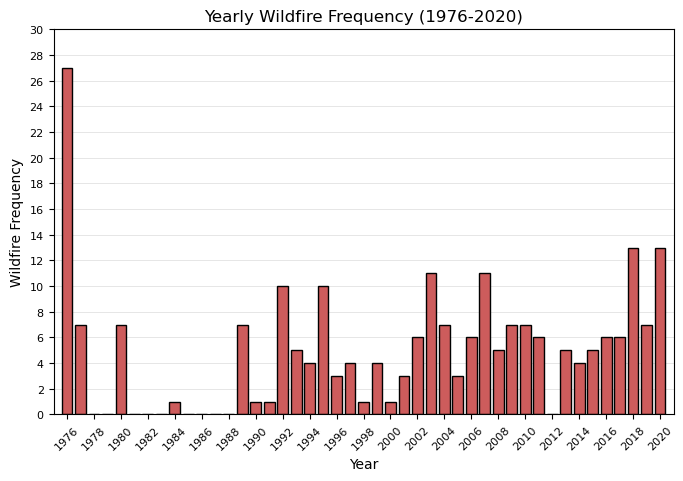

 Figure 1: Wildfire frequency per year from 1976-2020


In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar plot using the 'wildfire_per_year' DataFrame
plt.figure(figsize=(8, 5), dpi=100)
plt.bar(wildfire_per_year['Year'], wildfire_per_year['Wildfire Count'], color='indianred', edgecolor='black', zorder=2)

plt.xlabel('Year')
plt.ylabel('Wildfire Frequency')
plt.title('Yearly Wildfire Frequency (1976-2020)')

# Set x-ticks at intervals of 2 years
plt.xticks(np.arange(min(wildfire_per_year['Year']), max(wildfire_per_year['Year']) + 1, 2), rotation=45, fontsize=8)
# Set y-ticks based on the total wildfire quantity
plt.yticks(np.arange(0, 31, 2), fontsize=8)
plt.xlim(1975, 2021)
plt.ylim(0, 30)

plt.grid(axis='y', color='gray', linewidth=0.7, alpha=0.2, zorder=0)

plt.show()

print(' Figure 1: Wildfire frequency per year from 1976-2020')

### Exploring wildfires and climate:

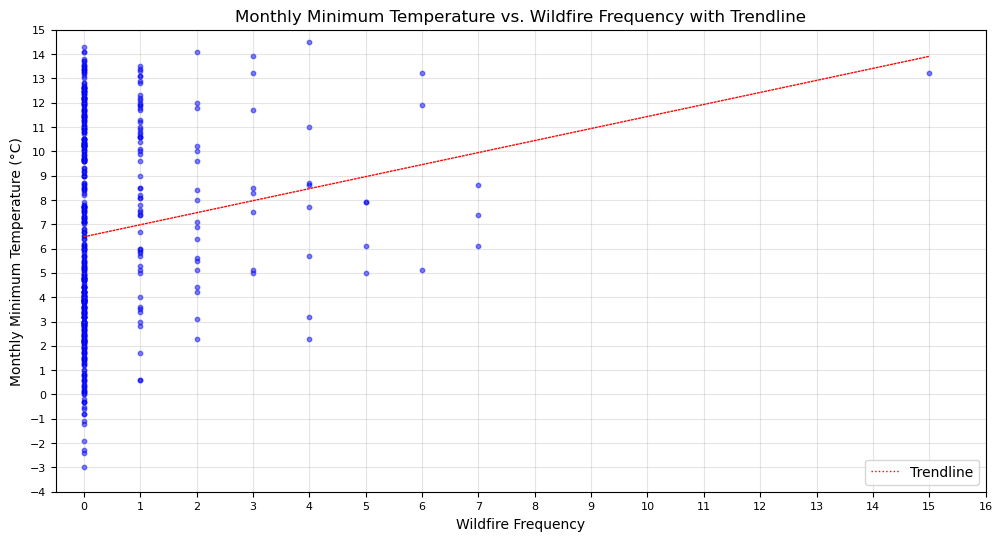

In [25]:
#Linear regression to calculate trend line

x = df['wildfire_quantity']
y = df['tmin_degC']

plt.figure(figsize=(12, 6))

plt.scatter(x, y, color='blue', alpha=0.5, s=10)  # 'p(x)' gives the y-values of the trend line

mask = ~np.isnan(x) & ~np.isnan(y)  # Ensure no NaN values are included
x_fit = x[mask]
y_fit = y[mask]

# Fit the line (1st degree polynomial)
coefficients = np.polyfit(x_fit, y_fit, 1)  # Linear fit
trendline = np.polyval(coefficients, x)  # Calculate the trendline values

# Plot the trendline
plt.plot(x, trendline, color='red', linewidth=1, linestyle=':', label='Trendline')  # Add trendline with label

# Add labels, title, and legend
plt.xlabel('Wildfire Frequency')
plt.ylabel('Monthly Minimum Temperature (°C)')
plt.title('Monthly Minimum Temperature vs. Wildfire Frequency with Trendline')
plt.xlim(-0.5, 16)
plt.ylim(-4, 15)
plt.xticks(np.arange(0, 17, 1), fontsize=8)  # Adjusted range for x-ticks
plt.yticks(np.arange(-4, 16, 1), fontsize=8)  # Adjusted range for y-ticks
plt.legend()  # Show the legend
plt.grid(color='gray', alpha=0.2)

# Show the plot
plt.show()

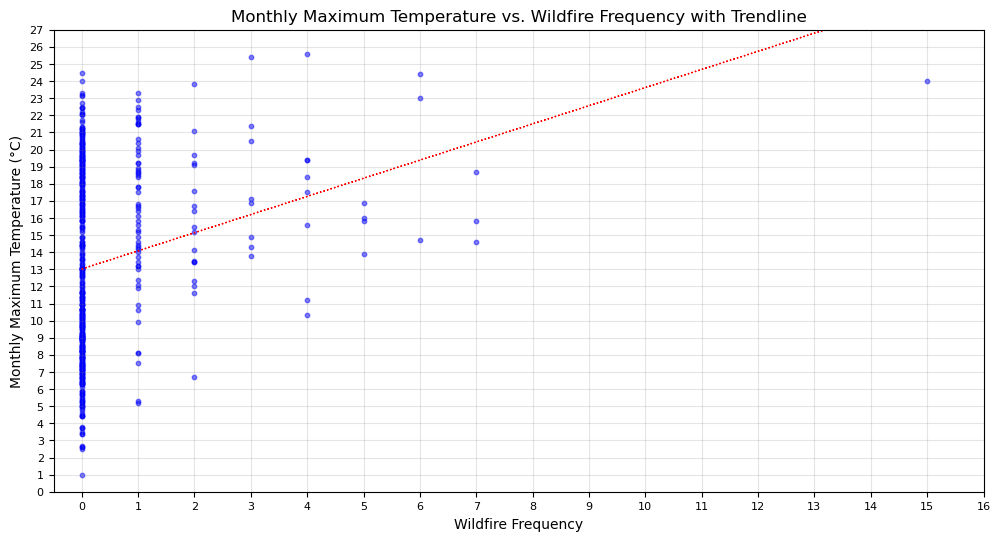

 Figure 8: An increase in wildfire frequency with monthly maximum temperature for data between
 1976-2020


In [27]:
#Linear regression to calculate trend line

x = df['wildfire_quantity']
y = df['tmax_degC']

plt.figure(figsize=(12, 6))

plt.scatter(x, y, color='blue', alpha=0.5, s=10)  # 'p(x)' gives the y-values of the trend line

mask = ~np.isnan(x) & ~np.isnan(y)  # Ensure no NaN values are included
x_fit = x[mask]
y_fit = y[mask]

# Fit the line (1st degree polynomial)
coefficients = np.polyfit(x_fit, y_fit, 1)  # Linear fit
trendline = np.polyval(coefficients, x)  # Calculate the trendline values

# Plot the trendline
plt.plot(x, trendline, color='red', linewidth=1, linestyle=':', label='Trendline')  # Add trendline with label

# Add labels, title, and legend
plt.xlabel('Wildfire Frequency')
plt.ylabel('Monthly Maximum Temperature (°C)')
plt.title('Monthly Maximum Temperature vs. Wildfire Frequency with Trendline')
plt.xlim(-0.5, 16)
plt.ylim(0, 27)
plt.xticks(np.arange(0, 17, 1), fontsize=8)  # Adjusted range for x-ticks
plt.yticks(np.arange(0, 28, 1), fontsize=8)  # Adjusted range for y-ticks
plt.grid(color='gray', alpha=0.2)

# Show the plot
plt.show()

print(' Figure 8: An increase in wildfire frequency with monthly maximum temperature for data between')
print(' 1976-2020')

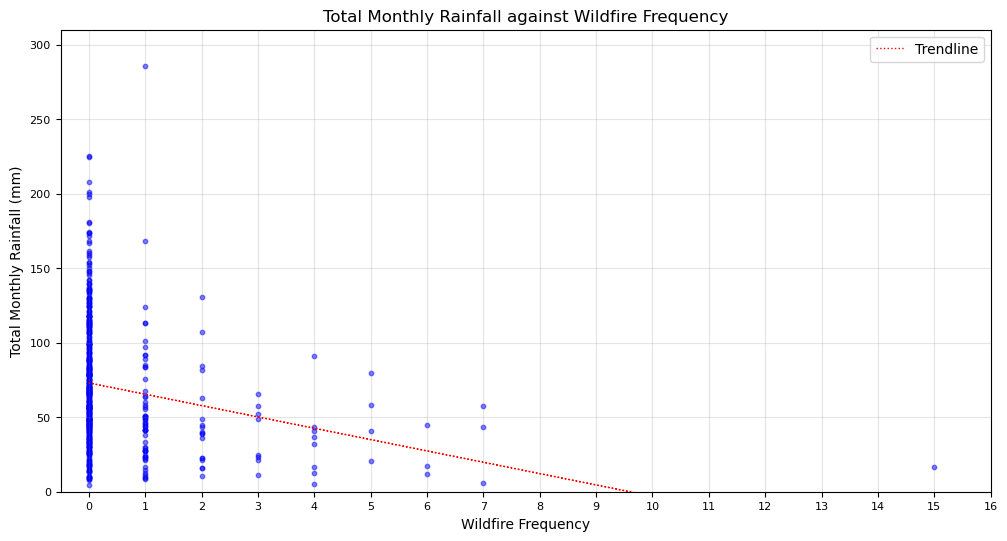

 Figure 8: A decrease in wildfire frequency with total monthly rainfall for data between 1976-2020


In [28]:
#Linear regression to calculate trend line

x = df['wildfire_quantity']
y = df['totalrain_mm']

plt.figure(figsize=(12, 6))

plt.scatter(x, y, color='blue', alpha=0.5, s=10)  # 'p(x)' gives the y-values of the trend line

mask = ~np.isnan(x) & ~np.isnan(y)  # Ensure no NaN values are included
x_fit = x[mask]
y_fit = y[mask]

# Fit the line (1st degree polynomial)
coefficients = np.polyfit(x_fit, y_fit, 1)  # Linear fit
trendline = np.polyval(coefficients, x)  # Calculate the trendline values

# Plot the trendline
plt.plot(x, trendline, color='red', linewidth=1, linestyle=':', label='Trendline')  # Add trendline with label

# Add labels, title, and legend
plt.xlabel('Wildfire Frequency')
plt.ylabel('Total Monthly Rainfall (mm)')
plt.title('Total Monthly Rainfall against Wildfire Frequency')
plt.xlim(-0.5, 16)
plt.ylim(0, 310)
plt.xticks(np.arange(0, 17, 1), fontsize=8)  # Adjusted range for x-ticks
plt.yticks(np.arange(0, 350, 50), fontsize=8)  # Adjusted range for y-ticks
plt.legend()  # Show the legend
plt.grid(color='gray', alpha=0.2)

# Show the plot
plt.show()

print(' Figure 8: A decrease in wildfire frequency with total monthly rainfall for data between 1976-2020')

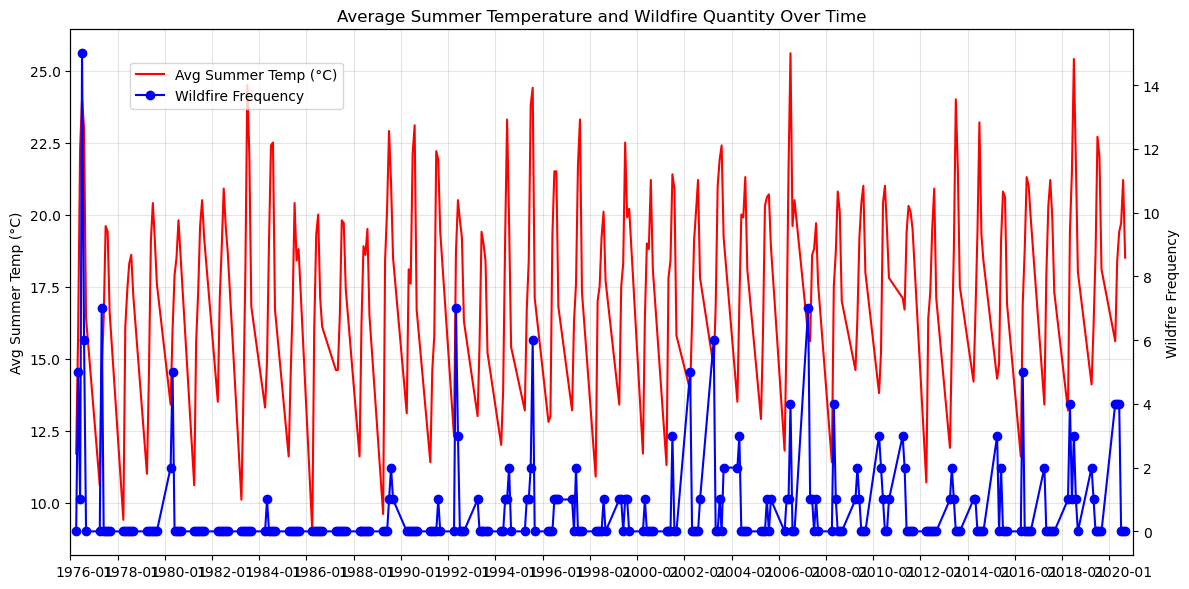

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.transforms import ScaledTranslation

# Assuming your DataFrame 'df' already exists
# Fix 'year_month' format to "YYYY-MM" using string formatting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: f'{x:02}')

# Convert to datetime
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

# Filter for summer months only (April to September)
summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

# Calculate the average summer temperature per year
average_summer_temp = summer_df.groupby('year')['tmax_degC'].mean().reset_index()
average_summer_temp.columns = ['year', 'avg_summer_temp_degC']

# Merge the average summer temperature data back with the original DataFrame
df = df.merge(average_summer_temp, on='year', suffixes=('', '_avg_summer'))

# Prepare data for plotting
x = df['year_month']  # X-axis: datetime representation of 'year_month'
y1 = df['wildfire_quantity']  # Y-axis 1: wildfire quantity
y2 = df['avg_summer_temp_degC']  # Y-axis 2: average summer temperature

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_summer_temp_degC on the left y-axis
line1, = ax1.plot(x, y2, label='Avg Summer Temp (°C)', color='red')
ax1.set_ylabel('Avg Summer Temp (°C)')
ax1.tick_params(axis='y')

# Create a second y-axis for wildfire quantity
ax2 = ax1.twinx()
line2, = ax2.plot(x, y1, label='Wildfire Frequency', color='blue', marker='o')
ax2.set_ylabel('Wildfire Frequency')
ax2.tick_params(axis='y')

# Set the x-ticks to display only every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Set major ticks to every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'

# Add limits to the x-axis
plt.xlim(pd.Timestamp('1976-01-01'), pd.Timestamp('2020-12-31'))

# Adding labels, title, and legend
plt.xlabel('Year-Month')
plt.title('Average Summer Temperature and Wildfire Quantity Over Time')
ax1.grid(color='grey', alpha=0.2)

# Combine legends from both y-axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Adjust x-tick label positions
offset = ScaledTranslation(10/72, 0, plt.gcf().dpi_scale_trans)  # Adjust 10/72 as needed
for label in ax1.get_xticklabels():
    label.set_transform(label.get_transform() + offset)

# Display the plot
plt.tight_layout()
plt.show()


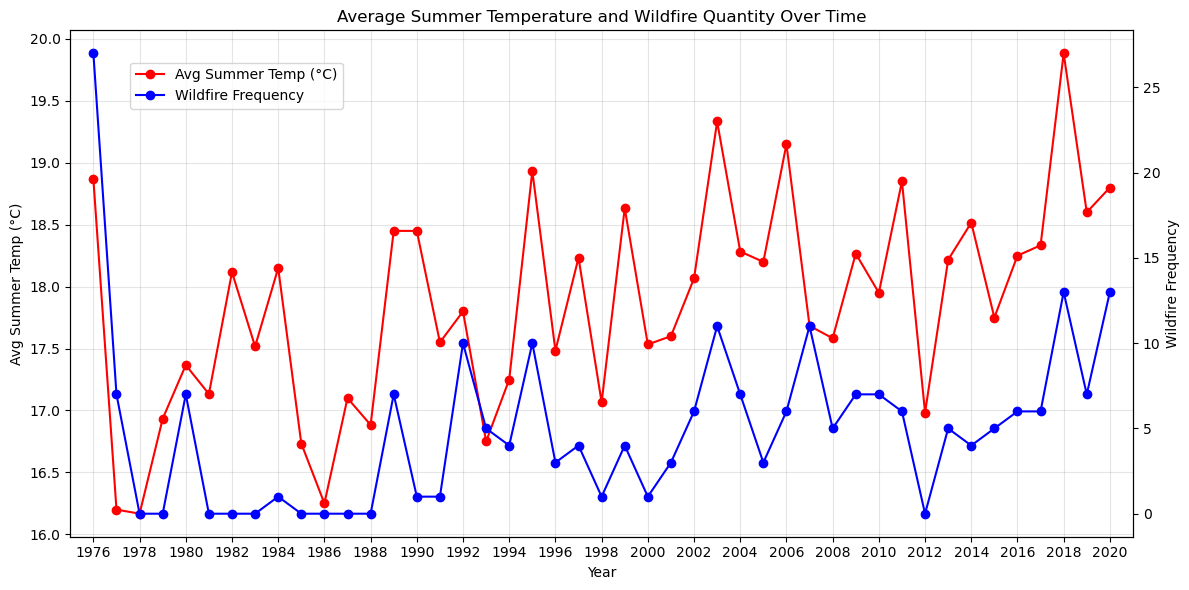

 Figure 9: Average summer temperature (taken as the mean temperature per year for months between April
 and September), showing a correlation between temperature and wildfire frequency plotted between 1976
 -2020


In [846]:
# Combine year and month into a single datetime column

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

average_summer_temp = summer_df.groupby('year')['tmax_degC'].mean().reset_index()
average_summer_temp.columns = ['year', 'avg_summer_temp_degC']

# Merge the new average summer temperature data with the original DataFrame, specifying suffixes
df = df.merge(average_summer_temp, on='year', suffixes=('', '_avg_summer'))

# Now, plot the wildfire quantity and average summer temperature over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_summer_temp_degC on the left y-axis
line1, = ax1.plot(average_summer_temp['year'], average_summer_temp['avg_summer_temp_degC'], label='Avg Summer Temp (°C)', color='red', marker='o')
ax1.set_ylabel('Avg Summer Temp (°C)')
ax1.tick_params(axis='y')

# Create a second y-axis for wildfire quantity
ax2 = ax1.twinx()
line2, = ax2.plot(df['year'].unique(), df.groupby('year')['wildfire_quantity'].sum(), label='Wildfire Frequency', color='blue', marker='o')
ax2.set_ylabel('Wildfire Frequency')
ax2.tick_params(axis='y')

ax1.set_xlabel('Year')

# Adding labels and title
plt.title('Average Summer Temperature and Wildfire Quantity Over Time')
ax1.grid(color='grey', alpha=0.2)

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Show the plot
plt.xticks(np.arange(1976, 2021, 2), rotation=45)
plt.xlim(1975,2021)
plt.xlabel('Year')
plt.tight_layout()
plt.show()

print(' Figure 9: Average summer temperature (taken as the mean temperature per year for months between April')
print(' and September), showing a correlation between temperature and wildfire frequency plotted between 1976')
print(' -2020')

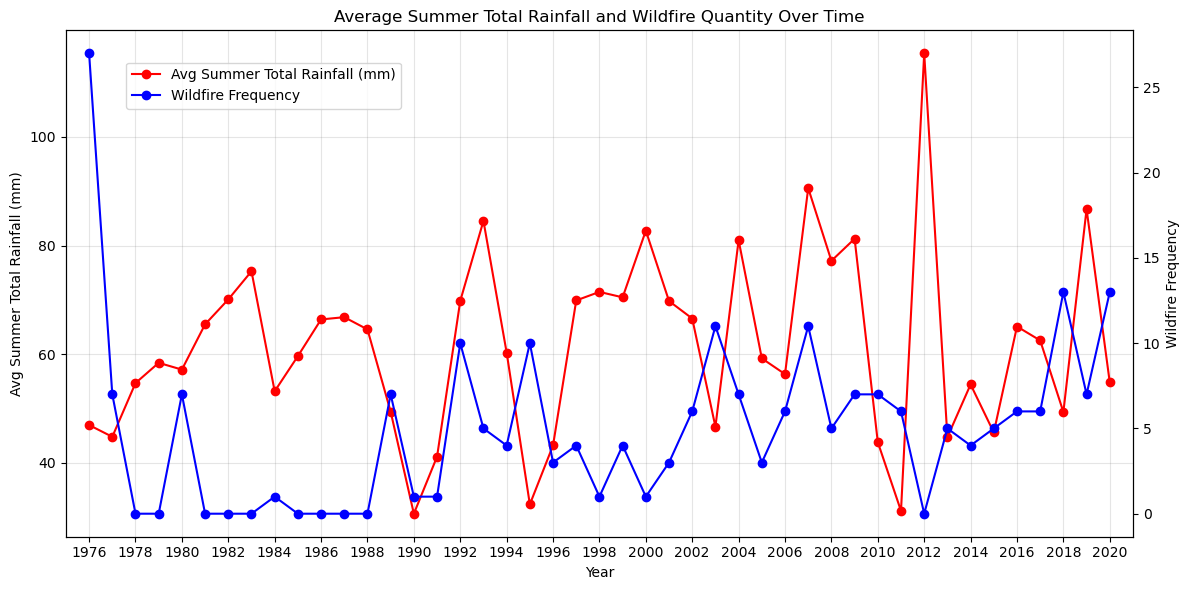

 Figure 10: Average summer total rainfall (taken as the mean total rainfall per year for months
 between April and September), showing a correlation between temperature and wildfire frequency
 plotted between 1976-2020


In [858]:
# Combine year and month into a single datetime column

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

average_summer_rainfall = summer_df.groupby('year')['totalrain_mm'].mean().reset_index()
average_summer_rainfall.columns = ['year', 'avg_summer_totalrain_mm']

# Merge the new average summer temperature data with the original DataFrame, specifying suffixes
df = df.merge(average_summer_rainfall, on='year', suffixes=('', '_avg_summer'))

# Now, plot the wildfire quantity and average summer temperature over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_summer_temp_degC on the left y-axis
line1, = ax1.plot(average_summer_rainfall['year'], average_summer_rainfall['avg_summer_totalrain_mm'], label='Avg Summer Total Rainfall (mm)', color='red', marker='o')
ax1.set_ylabel('Avg Summer Total Rainfall (mm)')
ax1.tick_params(axis='y')

# Create a second y-axis for wildfire quantity
ax2 = ax1.twinx()
line2, = ax2.plot(df['year'].unique(), df.groupby('year')['wildfire_quantity'].sum(), label='Wildfire Frequency', color='blue', marker='o')
ax2.set_ylabel('Wildfire Frequency')
ax2.tick_params(axis='y')

ax1.set_xlabel('Year')

# Adding labels and title
plt.title('Average Summer Total Rainfall and Wildfire Quantity Over Time')
ax1.grid(color='grey', alpha=0.2)

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Show the plot
plt.xticks(np.arange(1976, 2021, 2), rotation=45)
plt.xlim(1975,2021)
plt.xlabel('Year')
plt.tight_layout()
plt.show()

print(' Figure 10: Average summer total rainfall (taken as the mean total rainfall per year for months')
print(' between April and September), showing a correlation between temperature and wildfire frequency')
print(' plotted between 1976-2020')

### Lag Feature Creation

In [949]:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

In [951]:
#Creating a lag feature for tmax_degC and totalrain_mm

df['tmax_degC_lag1'] = df['tmax_degC'].shift(1)
df['totalrain_mm_lag1'] = df['totalrain_mm'].shift(1)

df = df.dropna()

print(df['totalrain_mm'].head())
print(df['totalrain_mm_lag1'].head())

1    79.90000000000000568434
2    16.60000000000000142109
3    16.89999999999999857891
4    17.30000000000000071054
5   134.90000000000000568434
Name: totalrain_mm, dtype: float64
1   16.19999999999999928946
2   79.90000000000000568434
3   16.60000000000000142109
4   16.89999999999999857891
5   17.30000000000000071054
Name: totalrain_mm_lag1, dtype: float64


In [957]:
#tesgting linear correlation between wildfire_quantity and tmax/totalrain vs. lag
#non-normal data so therefore spearmans 
from scipy.stats import spearmanr

#spearman correlation between 'wildfire_quantity' and 'tmax_degC'
spearman_corr_tmax = spearmanr(df['wildfire_quantity'], df['tmax_degC'])
print(f"Spearman correlation between 'wildfire_quantity' and 'tmax_degC': {spearman_corr_tmax.correlation:.3f}, p-value: {spearman_corr_tmax.pvalue:.3f}")

#spearman correlation between 'wildfire_quantity' and 'tmax_degC_lag1'
spearman_corr_tmax_lag1 = spearmanr(df['wildfire_quantity'], df['tmax_degC_lag1'])
print(f"Spearman correlation between 'wildfire_quantity' and 'tmax_degC_lag1': {spearman_corr_tmax_lag1.correlation:.3f}, p-value: {spearman_corr_tmax_lag1.pvalue:.3f}")

#spearman correlation between 'wildfire_quantity' and 'tmax_degC'
spearman_corr_tmax = spearmanr(df['wildfire_quantity'], df['totalrain_mm'])
print(f"Spearman correlation between 'wildfire_quantity' and 'totalrain_mm': {spearman_corr_tmax.correlation:.3f}, p-value: {spearman_corr_tmax.pvalue:.3f}")

#spearman correlation between 'wildfire_quantity' and 'tmax_degC_lag1'
spearman_corr_tmax_lag1 = spearmanr(df['wildfire_quantity'], df['totalrain_mm_lag1'])
print(f"Spearman correlation between 'wildfire_quantity' and 'totalrain_mm_lag1': {spearman_corr_tmax_lag1.correlation:.3f}, p-value: {spearman_corr_tmax_lag1.pvalue:.3f}")

Spearman correlation between 'wildfire_quantity' and 'tmax_degC': 0.274, p-value: 0.000
Spearman correlation between 'wildfire_quantity' and 'tmax_degC_lag1': 0.103, p-value: 0.018
Spearman correlation between 'wildfire_quantity' and 'totalrain_mm': -0.293, p-value: 0.000
Spearman correlation between 'wildfire_quantity' and 'totalrain_mm_lag1': -0.209, p-value: 0.000


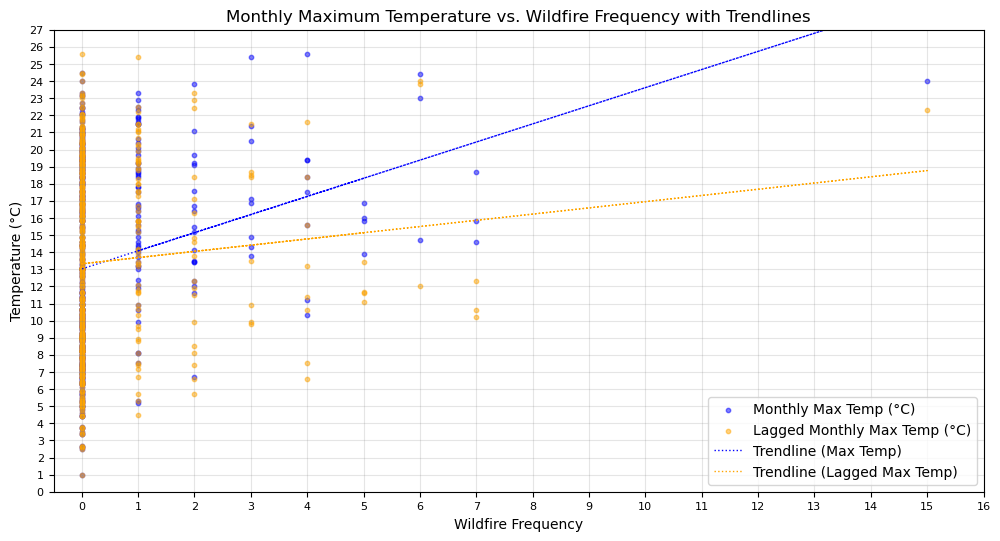

Figure 8: An increase in wildfire frequency with monthly maximum temperature and lagged temperature data between 1976-2020


In [953]:
#plotting new tmax_degC_lag1 variable alongside tmax_degC and wildfire frequency 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Linear regression to calculate trend line for 'tmax_degC'
x1 = df['wildfire_quantity']
y1 = df['tmax_degC']

# Linear regression to calculate trend line for 'tmax_degC_lag1'
y2 = df['tmax_degC_lag1']

plt.figure(figsize=(12, 6))

# Scatter plot for tmax_degC
plt.scatter(x1, y1, color='blue', alpha=0.5, s=10, label='Monthly Max Temp (°C)')  # Scatter plot for tmax_degC

# Scatter plot for tmax_degC_lag1
plt.scatter(x1, y2, color='orange', alpha=0.5, s=10, label='Lagged Monthly Max Temp (°C)')  # Scatter plot for tmax_degC_lag1

# Fit the trendline for tmax_degC
mask = ~np.isnan(x1) & ~np.isnan(y1)  # Ensure no NaN values are included
x_fit1 = x1[mask]
y_fit1 = y1[mask]

# Fit the line (1st degree polynomial) for tmax_degC
coefficients1 = np.polyfit(x_fit1, y_fit1, 1)  # Linear fit
trendline1 = np.polyval(coefficients1, x1)  # Calculate the trendline values

# Plot the trendline for tmax_degC
plt.plot(x1, trendline1, color='blue', linewidth=1, linestyle=':', label='Trendline (Max Temp)')  # Add trendline with label

# Fit the trendline for tmax_degC_lag1
mask = ~np.isnan(x1) & ~np.isnan(y2)  # Ensure no NaN values are included for the lagged temperature
y_fit2 = y2[mask]

# Fit the line (1st degree polynomial) for tmax_degC_lag1
coefficients2 = np.polyfit(x1[mask], y_fit2, 1)  # Linear fit for lagged temperature
trendline2 = np.polyval(coefficients2, x1)  # Calculate the trendline values

# Plot the trendline for tmax_degC_lag1
plt.plot(x1, trendline2, color='orange', linewidth=1, linestyle=':', label='Trendline (Lagged Max Temp)')  # Add trendline with label

# Add labels, title, and legend
plt.xlabel('Wildfire Frequency')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Maximum Temperature vs. Wildfire Frequency with Trendlines')
plt.xlim(-0.5, 16)
plt.ylim(0, 27)
plt.xticks(np.arange(0, 17, 1), fontsize=8)  # Adjusted range for x-ticks
plt.yticks(np.arange(0, 28, 1), fontsize=8)  # Adjusted range for y-ticks
plt.legend()  # Show the legend
plt.grid(color='gray', alpha=0.2)

# Show the plot
plt.show()

print('Figure 8: An increase in wildfire frequency with monthly maximum temperature and lagged temperature data between 1976-2020')


In [92]:
#Lag for average of 4 months to represent a season rather than a lag by 1 month 
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

#Creating a lag feature for tmax_degC and totalrain_mm
df['totalrain_mm_avg4'] = df['totalrain_mm'].rolling(window=4, min_periods=1).mean()

#this removes NaN values from the first 4 months of the dataset
#df = df.dropna()

print(df['totalrain_mm'].head())
print(df['totalrain_mm_avg4'].head())

pd.reset_option('display.max_rows')
print(df['totalrain_mm_avg4'])

#df.drop('tmax_degC_lag4', axis=1, inplace=True)

#Creating a lag feature for tmax_degC
df['tmax_degC_avg4'] = df['tmax_degC'].rolling(window=4, min_periods=1).mean()

#this removes NaN values from the first 4 months of the dataset
#df = df.dropna()

print(df['tmax_degC'].head())
print(df['tmax_degC_avg4'].head())

print(df['tmax_degC_avg4'])

0    16.2
1    79.9
2    16.6
3    16.9
4    17.3
Name: totalrain_mm, dtype: float64
0    16.200000
1    48.050000
2    37.566667
3    32.400000
4    32.675000
Name: totalrain_mm_avg4, dtype: float64
0      16.200000
1      48.050000
2      37.566667
3      32.400000
4      32.675000
         ...    
532    72.750000
533    77.750000
534    79.050000
535    68.850000
536    71.700000
Name: totalrain_mm_avg4, Length: 537, dtype: float64
0    11.7
1    15.8
2    22.3
3    24.0
4    23.0
Name: tmax_degC, dtype: float64
0    11.700
1    13.750
2    16.600
3    18.450
4    21.275
Name: tmax_degC_avg4, dtype: float64
0      11.700
1      13.750
2      16.600
3      18.450
4      21.275
        ...  
532    19.675
533    19.700
534    18.100
535    15.925
536    12.375
Name: tmax_degC_avg4, Length: 537, dtype: float64


In [99]:
import pandas as pd

pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
print(df.to_string(index=True))

     year  month  tmax_degC  tmin_degC  airfrost_days  totalrain_mm  totalsun_hours  wildfire_quantity  totalrain_mm_avg4  tmax_degC_avg4
0    1976      4       11.7        4.4              2          16.2           116.1                  0          16.200000          11.700
1    1976      5       15.8        7.9              0          79.9           148.6                  5          48.050000          13.750
2    1976      6       22.3       12.0              0          16.6           250.2                  1          37.566667          16.600
3    1976      7       24.0       13.2              0          16.9           285.2                 15          32.400000          18.450
4    1976      8       23.0       11.9              0          17.3           215.6                  6          32.675000          21.275
5    1976      9       16.4        9.6              0         134.9            85.5                  0          46.425000          21.425
6    1976     10       13.0       

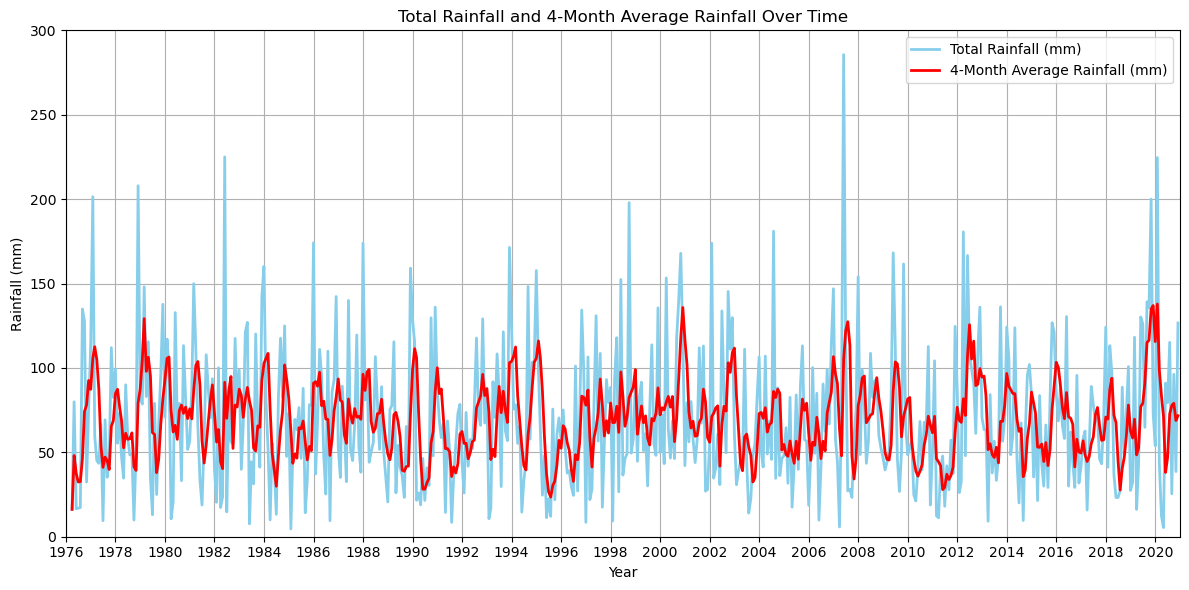

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.transforms import ScaledTranslation

# Fix 'year_month' format to "YYYY-MM" using string formatting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: f'{x:02}')

# Convert to datetime
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

x = df['year_month']  # X-axis: datetime representation of 'year_month'
y1 = df['totalrain_mm']  # Y-axis 1: 'totalrain_mm'
y2 = df['totalrain_mm_avg4']  # Y-axis 2: 'totalrain_mm_avg4'

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the first line
plt.plot(x, y1, color='skyblue', label='Total Rainfall (mm)', linewidth=2)
# Plot the second line
plt.plot(x, y2, color='red', label='4-Month Average Rainfall (mm)', linewidth=2)

# Set the x-ticks to display only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Set major ticks to years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as 'YYYY'

# Add limits to the x-axis
plt.xlim(pd.Timestamp('1976-01-01'), pd.Timestamp('2020-12-31'))
plt.ylim(0,300)

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Total Rainfall and 4-Month Average Rainfall Over Time')
plt.legend()
plt.grid(True)

# Format the x-axis labels for better visibility
offset = ScaledTranslation(0/72, 0, plt.gcf().dpi_scale_trans)  # Adjust 10/72 as needed
for label in plt.gca().get_xticklabels():
    label.set_transform(label.get_transform() + offset)

# Display the plot
plt.tight_layout()
plt.show()

### Correlation Analysis 

                       year     month  tmax_degC  tmin_degC  airfrost_days  \
year               1.000000 -0.005433   0.086464   0.098781      -0.128105   
month             -0.005433  1.000000   0.214449   0.320055      -0.271554   
tmax_degC          0.086464  0.214449   1.000000   0.971973      -0.720876   
tmin_degC          0.098781  0.320055   0.971973   1.000000      -0.732513   
airfrost_days     -0.128105 -0.271554  -0.720876  -0.732513       1.000000   
totalrain_mm      -0.008878  0.101622  -0.192867  -0.116679       0.011625   
totalsun_hours     0.076748 -0.078465   0.830068   0.706844      -0.526651   
wildfire_quantity  0.187608 -0.123522   0.227042   0.129659      -0.138145   
totalrain_mm_lag4 -0.002779 -0.123870  -0.053764  -0.097980       0.005253   

                   totalrain_mm  totalsun_hours  wildfire_quantity  \
year                  -0.008878        0.076748           0.187608   
month                  0.101622       -0.078465          -0.123522   
tmax_degC

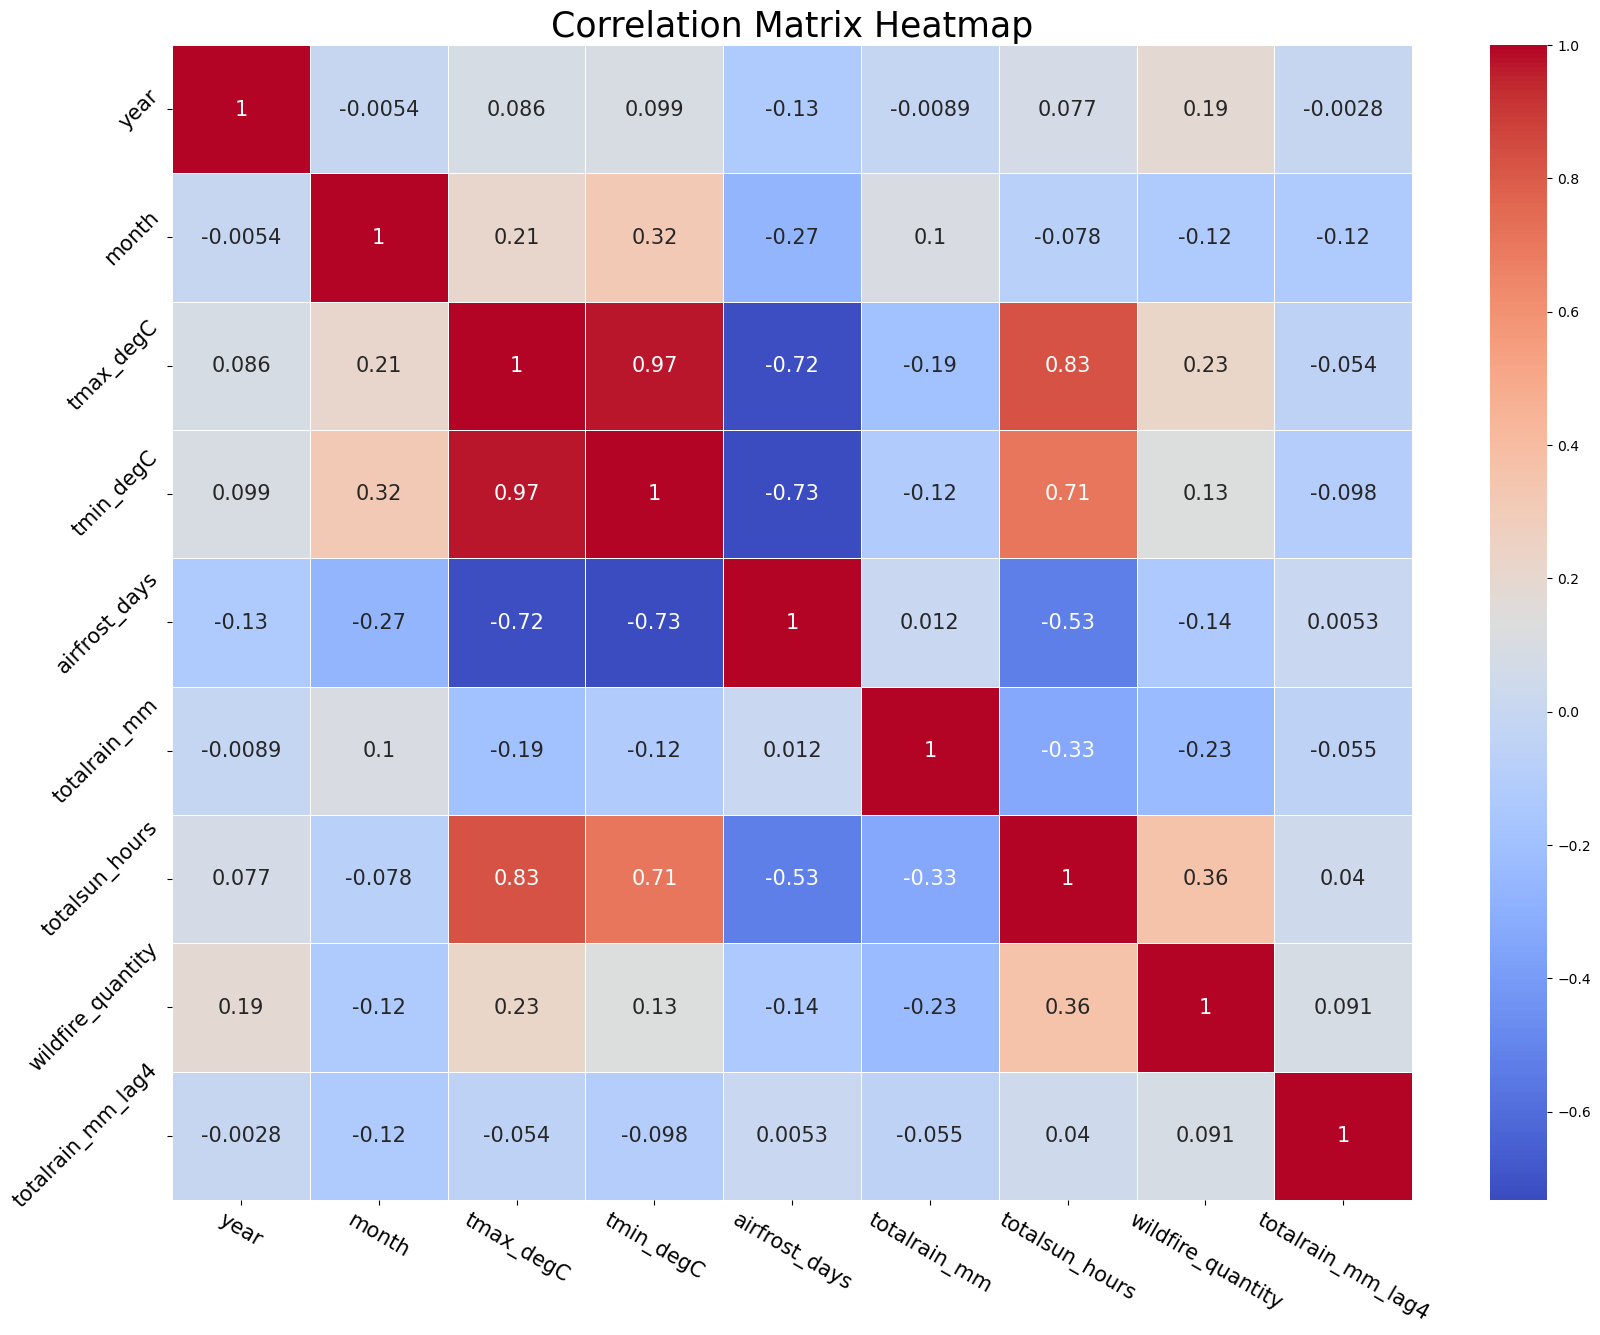

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Calculate the correlation matrix

corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size":15})
plt.title('Correlation Matrix Heatmap', size=25)
plt.xticks(size=15, rotation=-30)
plt.yticks(size=15, rotation=45)
plt.show()

In [934]:
print(df['tmax_degC_lag1'].head())

3    22.3
4    24.0
5    23.0
6    16.4
7    13.0
Name: tmax_degC_lag1, dtype: float64


In [942]:
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression

# Define features (X) and target (y)
X = df[['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_y-n', 'tmax_degC_lag1', 'totalrain_mm_lag1']]
y = df['wildfire_quantity']

# Perform linear feature selection using f_regression
f_values, f_pvalues = f_regression(X, y)

# Perform non-linear feature selection using mutual_info_regression
mi_values = mutual_info_regression(X, y)

pd.set_option('display.float_format', '{:.20f}'.format)  # Change .2f to your desired decimal places

# Combine results into a DataFrame for easier comparison
results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'F-PValue': f_pvalues,
    'Mutual Information': mi_values
})

# Display the results
print(results)

# Combine results into a DataFrame for easier comparison
results_MI = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_values
})

# Display the results
print(results_MI)

             Feature                  F-Value               F-PValue  \
0               year   3.85605711533066264352 0.05008704851699877225   
1              month   5.01504919763943313171 0.02554031701233925450   
2          tmax_degC  32.72804392703325504499 0.00000001770611369421   
3          tmin_degC  11.99853846338525187321 0.00057534283259893149   
4      airfrost_days   9.62640283519974282456 0.00201986323783105238   
5       totalrain_mm  29.74660464470570886419 0.00000007552132558555   
6     totalsun_hours  84.53841326674771039507 0.00000000000000000085   
7       wildfire_y-n 490.92004893308666169105 0.00000000000000000000   
8     tmax_degC_lag1   3.95297322860326483251 0.04730064366322905139   
9  totalrain_mm_lag1  20.94125322322770799133 0.00000590000622732742   

      Mutual Information  
0 0.06128973494336431571  
1 0.08061906228444026823  
2 0.01991523426494090643  
3 0.01813144973346769717  
4 0.00000000000000000000  
5 0.07359974144467340551  
6 0.08995199709723

In [397]:
#Normal Distribution analysis:

from scipy.stats import ks_1samp, norm
import pandas as pd

# Perform K-S test for each feature
results = {}

# List of features to test
features = ['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 
            'totalrain_mm', 'totalsun_hours', 'wildfire_y-n', 'wildfire_quantity']

# Perform the K-S test for each feature
for column in features:
    # Get the data for the current column
    data = df[column]
    
    # Perform the K-S test against a normal distribution
    statistic, p_value = ks_1samp(data, norm.cdf, args=(data.mean(), data.std()))
    
    # Store the results
    results[column] = {'K-S Statistic': statistic, 'P-value': p_value}

# Convert the results to a DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                   K-S Statistic        P-value
year                    0.068062   1.315939e-02
month                   0.098753   5.195878e-05
tmax_degC               0.083883   9.793005e-04
tmin_degC               0.090977   2.561681e-04
airfrost_days           0.280038   9.773053e-38
totalrain_mm            0.089398   3.485673e-04
totalsun_hours          0.084525   8.712825e-04
wildfire_y-n            0.494961  5.290761e-122
wildfire_quantity       0.440496   2.144286e-95


These results indicate that all features devisate from a normal distribution - this means statistical analysis which assumes normal distribution would not be appropriate 

In [377]:
#In response to the correlation matrix, removing tmin_degC, airfrost_days, and totalsun_hours
#would be the best approach for minimising confusion.

In [379]:
#As wildfire_y-n and wildfire_quantity are a product of one another. I will continue to work with wildfire_quantity
#and therefore remove wildfire_y-n

                       year     month  tmax_degC  totalrain_mm  \
year               1.000000 -0.012498   0.073943     -0.001820   
month             -0.012498  1.000000   0.210888      0.091735   
tmax_degC          0.073943  0.210888   1.000000     -0.209155   
totalrain_mm      -0.001820  0.091735  -0.209155      1.000000   
wildfire_quantity  0.070661 -0.098040   0.241538     -0.225023   

                   wildfire_quantity  
year                        0.070661  
month                      -0.098040  
tmax_degC                   0.241538  
totalrain_mm               -0.225023  
wildfire_quantity           1.000000  


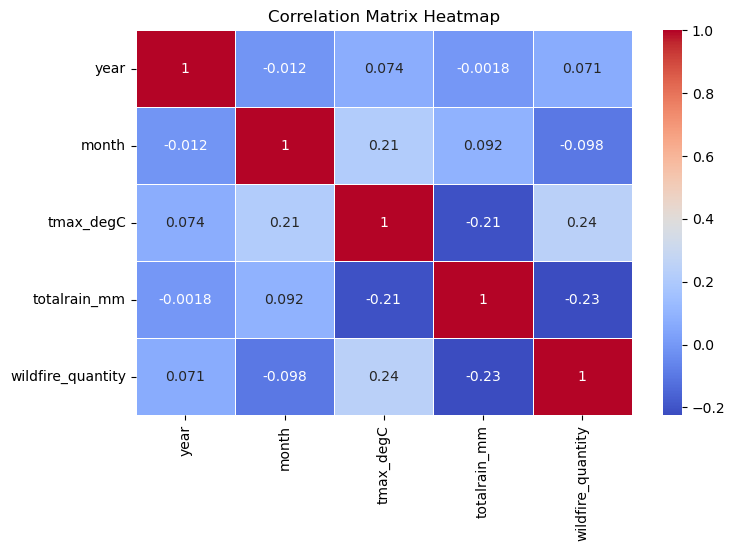

In [387]:
#defining new dataframe with removed variables:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

refined_df = df[['year', 'month', 'tmax_degC', 'totalrain_mm', 'wildfire_quantity']]

# Calculate the correlation matrix
corr_matrix = refined_df.corr()

# Display the correlation matrix
print(corr_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [389]:
#Now the correlation metrics are much more representative of independent features

In [606]:
#Choose time series split - first split data into k folds -> folds will be referenced when testing the ML model. use 3-4 folds
#play around with test, train size
#make sure train, test, and validation go in chronological order 

In [791]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

#define 'year_month' as a grouping criterion
df['year_month'] = df['year'].astype(str) + '_' + df['month'].astype(str)

#mark months 4–8 with higher importance
df['important_month'] = df['month'].apply(lambda x: 1 if 4 <= x <= 8 else 0)

#configure GroupShuffleSplit to ensure each split maintains month distribution
splitter = GroupShuffleSplit(n_splits=4, train_size=0.7, test_size=0.3, random_state=42)

#perform split ensuring that all months (1-12) are represented
train_splits = []
val_splits = []
test_splits = []

for train_idx, test_idx in splitter.split(df, groups=df['year_month']):
    #get training and test sets
    df_train_initial = df.iloc[train_idx]
    df_test = df.iloc[test_idx]
    
    #check if training data includes months 4–8
    train_with_important_months = df_train_initial[df_train_initial['important_month'] == 1]
    
    #debug information to understand why splits might be skipped
    print(f"Checking fold: {len(train_splits) + 1}")
    print(f"Months in training set: {df_train_initial['month'].unique()}")
    print(f"Months 4-9 coverage: {train_with_important_months['month'].nunique()} unique months")
    
    #if the important months are not adequately represented, skip this fold
    if train_with_important_months['month'].nunique() < 5:
        print("Skipping this fold due to inadequate coverage of months 4–9.")
        continue  # Skip to the next fold if months 4–9 are not fully present

    #split a validation set from the training data
    df_val = train_with_important_months.sample(frac=0.5, random_state=42)
    df_train_final = df_train_initial.drop(df_val.index)
    
    #store the splits for each fold
    train_splits.append(df_train_final)
    val_splits.append(df_val)
    test_splits.append(df_test)

#check if any valid splits were created
if len(train_splits) == 0:
    raise ValueError("No valid splits found. Consider adjusting the filtering criteria or data preprocessing steps.")

#example to show usage for the first fold
df_train = train_splits[0]
df_val = val_splits[0]
df_test = test_splits[0]

#define feature columns and target
feature_columns = ['tmax_degC', 'totalrain_mm', 'tmax_degC_lag1', 'totalrain_mm_lag1', 'year_month']
target_column = 'wildfire_quantity'

#ADDED to ensure year_month can be ordered in datetime format
# Replacing '_' with '-' for proper DateTime formatting
df_train.loc[:,'year_month'] = pd.to_datetime(df_train['year_month'].str.replace('_', '-'), format='%Y-%m')
df_val.loc[:,'year_month'] = pd.to_datetime(df_val['year_month'].str.replace('_', '-'), format='%Y-%m')
df_test.loc[:,'year_month'] = pd.to_datetime(df_test['year_month'].str.replace('_', '-'), format='%Y-%m')

#separate features and target for training, validation, and test sets
X_train = df_train[feature_columns]
y_train = df_train[target_column]

X_val = df_val[feature_columns]
y_val = df_val[target_column]

X_test = df_test[feature_columns]
y_test = df_test[target_column]

#outputs: X_train, y_train, X_val, y_val, X_test, y_test for the first fold

Checking fold: 1
Months in training set: [ 4  5  6  8  9 11  2  3 12  1 10  7]
Months 4-9 coverage: 5 unique months
Checking fold: 2
Months in training set: [ 5  6  7  8  9 10 12  1  2  3 11  4]
Months 4-9 coverage: 5 unique months
Checking fold: 3
Months in training set: [ 4  7  8  9 10 11  2  3  5  6 12  1]
Months 4-9 coverage: 5 unique months
Checking fold: 4
Months in training set: [ 4  5  6  7  8  9 11 12  1  2  3 10]
Months 4-9 coverage: 5 unique months


In [793]:
#sort the datasets by year_month
X_train = df_train[feature_columns].sort_values(by='year_month')
y_train = df_train[target_column].loc[X_train.index]  # Align y_train with sorted X_train

X_val = df_val[feature_columns].sort_values(by='year_month')
y_val = df_val[target_column].loc[X_val.index]  # Align y_val with sorted X_val

X_test = df_test[feature_columns].sort_values(by='year_month')
y_test = df_test[target_column].loc[X_test.index]  # Align y_test with sorted X_test

#verify the sorting by displaying the sorted DataFrames
print("Sorted X_train:")
print(X_train)
print("Sorted X_val:")
print(X_val)
print("Sorted X_test:")
print(X_test)

#check data types to confirm the year_month is DateTime
print("Data types:")
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

Sorted X_train:
     tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
1         15.8          79.9            11.7               16.2   
2         22.3          16.6            15.8               79.9   
4         23.0          17.3            24.0               16.9   
5         16.4         134.9            23.0               17.3   
7          8.6          32.4            13.0              127.7   
10         6.3         201.4             4.6              113.8   
11         9.5          59.7             6.3              201.4   
14        16.4          66.4            14.6               43.5   
17        16.6          35.2            19.4               69.2   
20         7.5          82.5             8.4              112.0   
21         5.3          99.4             7.5               82.5   
23        10.1          73.2             4.4               55.4   
24         9.4          47.3            10.1               73.2   
25        16.1          34.7             9.4  

In [795]:
#still problems sorting 'year_month' as this is formatted as a string (1976_10)

In [797]:
#test 'year_month' was successfully converted to DateTime:

print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

tmax_degC            float64
totalrain_mm         float64
tmax_degC_lag1       float64
totalrain_mm_lag1    float64
year_month            object
dtype: object
tmax_degC            float64
totalrain_mm         float64
tmax_degC_lag1       float64
totalrain_mm_lag1    float64
year_month            object
dtype: object
tmax_degC            float64
totalrain_mm         float64
tmax_degC_lag1       float64
totalrain_mm_lag1    float64
year_month            object
dtype: object


In [799]:
print(X_train.head())
print(y_train.head())

   tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
1       15.8          79.9            11.7               16.2   
2       22.3          16.6            15.8               79.9   
4       23.0          17.3            24.0               16.9   
5       16.4         134.9            23.0               17.3   
7        8.6          32.4            13.0              127.7   

            year_month  
1  1976-05-01 00:00:00  
2  1976-06-01 00:00:00  
4  1976-08-01 00:00:00  
5  1976-09-01 00:00:00  
7  1976-11-01 00:00:00  
1    5
2    1
4    6
5    0
7    0
Name: wildfire_quantity, dtype: int64


In [801]:
print(X_test.head())
print(y_test.head())

    tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
3        24.0          16.9            22.3               16.6   
6        13.0         127.7            16.4              134.9   
8         3.7          75.3             8.6               32.4   
9         4.6         113.8             3.7               75.3   
12       10.6          45.0             9.5               59.7   

             year_month  
3   1976-07-01 00:00:00  
6   1976-10-01 00:00:00  
8   1976-12-01 00:00:00  
9   1977-01-01 00:00:00  
12  1977-04-01 00:00:00  
3     15
6      0
8      0
9      0
12     0
Name: wildfire_quantity, dtype: int64


In [803]:
print(X_val.head())
print(y_val.head())

    tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
0        11.7          16.2             NaN                NaN   
13       14.6          43.5            10.6               45.0   
37       14.4         115.5            11.0               83.1   
38       19.1          34.9            14.4              115.5   
40       19.1          79.0            20.4               13.0   

             year_month  
0   1976-04-01 00:00:00  
13  1977-05-01 00:00:00  
37  1979-05-01 00:00:00  
38  1979-06-01 00:00:00  
40  1979-08-01 00:00:00  
0     0
13    7
37    0
38    0
40    0
Name: wildfire_quantity, dtype: int64


In [805]:
print(X_train)

     tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
1         15.8          79.9            11.7               16.2   
2         22.3          16.6            15.8               79.9   
4         23.0          17.3            24.0               16.9   
5         16.4         134.9            23.0               17.3   
7          8.6          32.4            13.0              127.7   
10         6.3         201.4             4.6              113.8   
11         9.5          59.7             6.3              201.4   
14        16.4          66.4            14.6               43.5   
17        16.6          35.2            19.4               69.2   
20         7.5          82.5             8.4              112.0   
21         5.3          99.4             7.5               82.5   
23        10.1          73.2             4.4               55.4   
24         9.4          47.3            10.1               73.2   
25        16.1          34.7             9.4               47.

In [807]:
print(X_val)

     tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
0         11.7          16.2             NaN                NaN   
13        14.6          43.5            10.6               45.0   
37        14.4         115.5            11.0               83.1   
38        19.1          34.9            14.4              115.5   
40        19.1          79.0            20.4               13.0   
48        13.4          10.6             7.4              100.1   
51        18.5          66.9            17.9              132.8   
61        15.6          65.3            10.6              110.5   
63        19.6          18.8            17.3               33.4   
64        20.5          57.2            19.6               18.8   
88        22.1          31.3            24.5               44.4   
96        13.3          10.0             7.3               52.3   
97        14.9          55.4            13.3               10.0   
99        22.4          13.3            19.1               40.

In [809]:
print(X_test)

     tmax_degC  totalrain_mm  tmax_degC_lag1  totalrain_mm_lag1  \
3         24.0          16.9            22.3               16.6   
6         13.0         127.7            16.4              134.9   
8          3.7          75.3             8.6               32.4   
9          4.6         113.8             3.7               75.3   
12        10.6          45.0             9.5               59.7   
15        19.6           9.5            16.4               66.4   
16        19.4          69.2            19.6                9.5   
18        14.0          45.4            16.6               35.2   
19         8.4         112.0            14.0               45.4   
22         4.4          55.4             5.3               99.4   
27        18.3          58.8            17.4               90.0   
28        18.6          48.5            18.3               58.8   
30        15.3           9.9            17.2               48.8   
33         2.5          82.3             5.0              207.

In [814]:
total_size = len(df)

#checking sizes of each set
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

#percentages
train_percentage = (train_size / total_size) * 100
val_percentage = (val_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

print(f"Total size of dataset: {total_size}")
print(f"Training set size: {train_size} ({train_percentage:.2f}%)")
print(f"Validation set size: {val_size} ({val_percentage:.2f}%)")
print(f"Test set size: {test_size} ({test_percentage:.2f}%)")


Total size of dataset: 537
Training set size: 297 (55.31%)
Validation set size: 78 (14.53%)
Test set size: 162 (30.17%)


### Pre-processing 

'tmax_degC', 'totalrain_mm', 'year_month'

transformer.fit for *train only*

next, for tmax and total rain, MinMaxScaler() applied *separetly for train, test, and validation*